## Delivery_time -> Predict delivery time using sorting time 

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [93]:
dataset= pd.read_csv('delivery_time.csv')

In [94]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [95]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [96]:
dataset = dataset.rename(columns={"Delivery Time":"hike","Sorting Time":"years"})
dataset.head()

,hike,years
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hike    21 non-null     float64
 1   years   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [98]:
dataset.describe()

,hike,years
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='hike', ylabel='Count'>

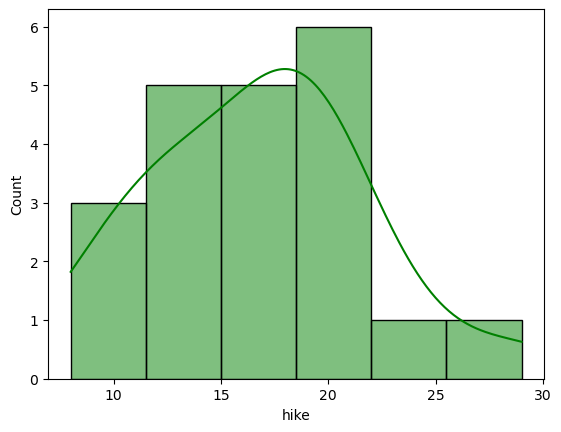

In [99]:
sns.histplot(dataset["hike"], color ='green',kde=True)

<Axes: xlabel='years', ylabel='Count'>

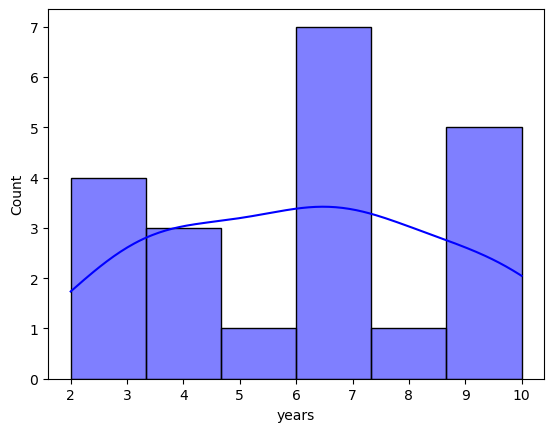

In [100]:
sns.histplot(dataset["years"], color ='blue',kde=True)

<Axes: >

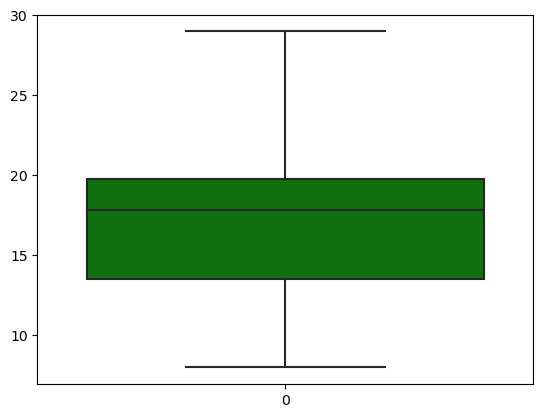

In [101]:
sns.boxplot(dataset["hike"], color ='green')

<Axes: >

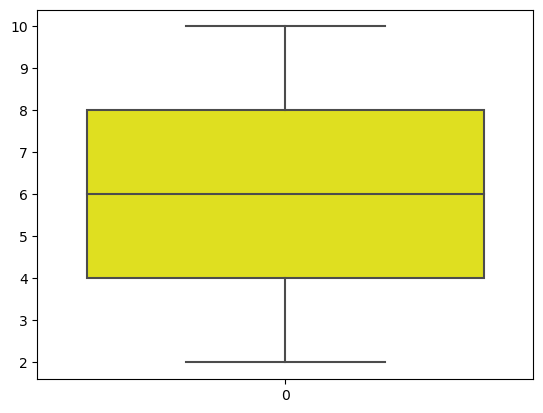

In [102]:
sns.boxplot(dataset["years"], color ='yellow')

<Axes: xlabel='years', ylabel='hike'>

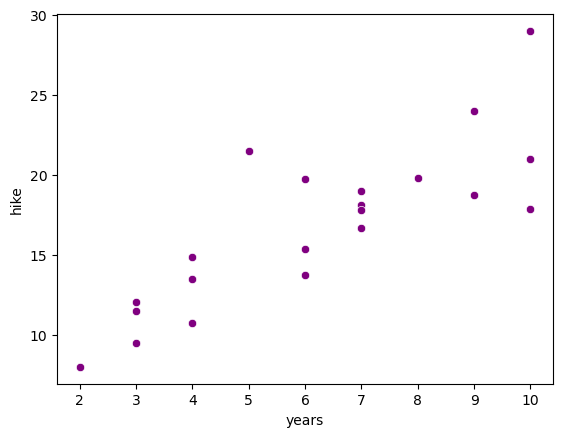

In [103]:
sns.scatterplot(y="hike",x="years",data=dataset, color = "purple" )

In [104]:
np.corrcoef(dataset["years"],dataset["hike"])

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [105]:
import statsmodels.formula.api as smf
model1= smf.ols('hike~years',data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        22:00:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
years          1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

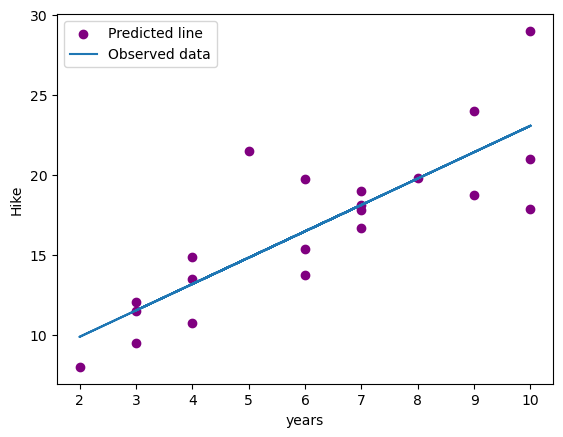

In [106]:
pred1 = model1.predict(pd.DataFrame(dataset['years']))
plt.scatter(x="years",y="hike",data=dataset, color = "purple" )
plt.plot(dataset['years'],pred1)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('years')
plt.ylabel('Hike')
plt.show()

In [107]:
res1 = dataset.hike - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

2.7916503270617654

array([[1.        , 0.83393253],
       [0.83393253, 1.        ]])

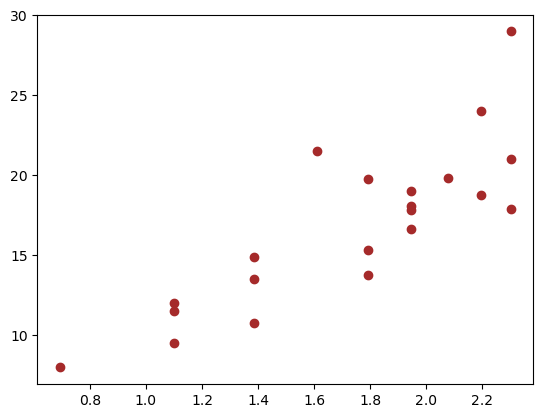

In [108]:
plt.scatter(x = np.log(dataset['years']), y = dataset['hike'], color = 'brown')
np.corrcoef(np.log(dataset['years']),dataset['hike'] ) 

In [109]:
model2= smf.ols('hike ~ np.log(years)',data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.64e-06
Time:                        22:00:38   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(years)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

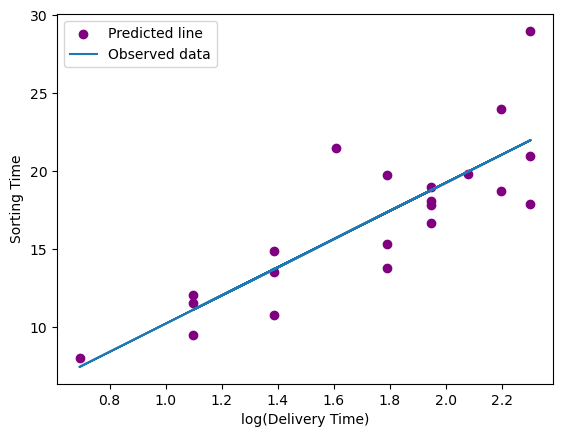

In [110]:
pred2 = model2.predict(pd.DataFrame(dataset['years']))
plt.scatter(x=np.log(dataset["years"]),y="hike",data= dataset, color = "purple" )
plt.plot(np.log(dataset['years']),pred2)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('log(Delivery Time)')
plt.ylabel('Sorting Time')
plt.show()

In [111]:
res2 = dataset.hike- pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

2.7331714766820663

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

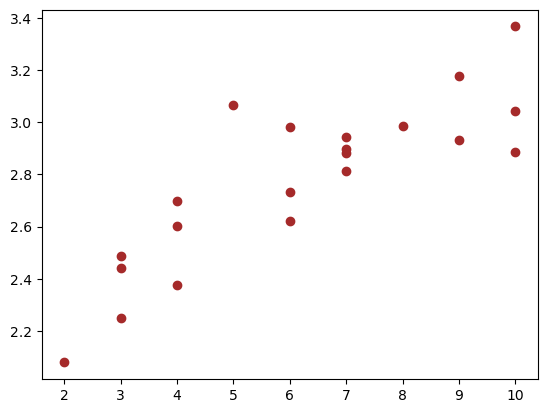

In [112]:
plt.scatter(x = dataset['years'], y= np.log(dataset['hike']), color = 'brown')
np.corrcoef(dataset['years'],np.log(dataset['hike']) )

In [113]:
import statsmodels.formula.api as smf
model3= smf.ols('np.log(hike) ~ years',data = dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(hike)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           1.59e-06
Time:                        22:00:39   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
years          0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

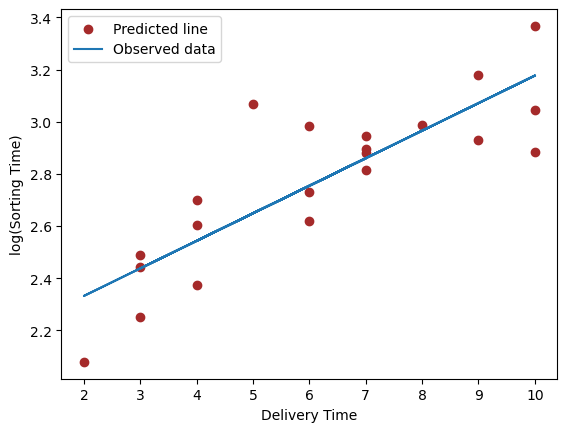

In [114]:
pred3 = model3.predict(pd.DataFrame(dataset['years']))
pred3_exp = np.exp(pred3)
plt.scatter(x =(dataset['years']), y = np.log(dataset['hike']), color = 'brown')
plt.plot(dataset['years'],pred3)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('Delivery Time')
plt.ylabel('log(Sorting Time)')
plt.show()

In [115]:
res3 = dataset.hike - pred3_exp
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

2.9402503230562007

In [116]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size = 0.25,random_state=6)

finalmodel = smf.ols('hike ~ years', data = train).fit()
finalmodel.summary()

C:\Users\pavan\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     28.01
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           0.000146
Time:                        22:00:40   Log-Likelihood:                -36.487
No. Observations:                  15   AIC:                             76.97
Df Residuals:                      13   BIC:                             78.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7043      2.185      3.068      0.009       1.983      11.425
years          1.6932      0.320      5.293      0.000       1.002       2.384
==============================================================================
Omnibus:                        4.391   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.480
Skew:                           0.991   Prob(JB):                        0.289
Kurtosis:                       3.203   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred 

16    16.863396
14    11.783863
4     23.636106
11    13.477040
12    18.556573
1     13.477040
19    18.556573
0     23.636106
17    18.556573
15    13.477040
13    11.783863
20    15.170218
3     21.942928
9     21.942928
10    20.249751
dtype: float64

In [118]:
train_res = train.hike - train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

2.755333120020976

In [119]:
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

18    10.090685
7     11.783863
5     16.863396
6     18.556573
8     23.636106
2     16.863396
dtype: float64

In [120]:
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

18    10.090685
7     11.783863
5     16.863396
6     18.556573
8     23.636106
2     16.863396
dtype: float64